In [1]:
import pandas as pd
import numpy as np
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import pandasql as ps

In [2]:
connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="cms2"
)

#client_account table
query = "SELECT * FROM client_account"
df_client= pd.read_sql(query,connection)

query = "SELECT * FROM banks"
df_bank = pd.read_sql(query,connection)
df_bank.drop(df_bank[df_bank.bank_id == 7].index, inplace = True)

query = "SELECT * FROM occupation"
df_occupation = pd.read_sql(query,connection)

In [3]:
df_client.dtypes

client_id                     int64
acc_type                     object
cd_code                      object
f_name                       object
l_name                       object
nationality                  object
ID                           object
DzongkhagID                   int64
tpn                          object
phone                        object
user_name                    object
email                        object
bank_id                       int64
bank_account                 object
bro_comm_id                   int64
address                      object
institution_id               object
ca_date              datetime64[ns]
title                        object
occupation                   object
bank_account_type            object
license_no                   object
dtype: object

In [4]:
df_occupation.dtypes

occupation          int64
occupation_name    object
dtype: object

In [5]:
df_client['occupation'] = df_client['occupation'].astype(str)
df_occupation['occupation'] = df_occupation['occupation'].astype(str)
data = pd.merge(df_client,df_occupation,how = 'inner', on = 'occupation')
data

,client_id,acc_type,cd_code,f_name,l_name,nationality,ID,DzongkhagID,tpn,phone,...,bank_account,bro_comm_id,address,institution_id,ca_date,title,occupation,bank_account_type,license_no,occupation_name
0,4,J,1000000001,ASTROLOGER INSTITUTE,,BHUTANESE,RI0000001,1308,,,...,,37,DECHENCHOLING,1,NaT,,101,Saving Account,None,OTHERS
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,,RI0000002,1308,,,...,,37,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,1,NaT,,101,\r,None,OTHERS
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,,RI0000003,1308,,,...,,37,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,1,NaT,,101,\r,None,OTHERS
3,7,J,1000000004,BULI GOMDEY,,BHUTANESE,RI0000004,1308,,,...,5000044274018,37,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,1,NaT,,101,Saving Account,None,OTHERS
4,8,J,1000000005,CENTRAL MONASTIC BODY,,,RI0000005,1308,,,...,110010161270,37,TASHI CHHODZONG THIMPHU : BHUTAN,1,NaT,,101,\r,None,OTHERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95527,90679,I,U000004890,CHENGA,,BHUTANESE,10704000198,1308,CAP04775,77114224,...,5000007358018,2,"BHUTAN AIRLINE, FLIGHT OPERATOR, THIMPHU",3,2021-07-15 16:35:08,MR,18,Saving Account,None,PILOT
95528,107651,I,R202107989,BIRKHA BDR SUNWAR,,BHUTANESE,11203000177,1310,,17985672,...,5100060364001,1,"BELPOTENG, TASHICHHOLING",2,2021-08-26 17:36:48,,71,Saving Account,None,GOLDSMITH
95529,108217,I,R202160021,NIMA,WANGCHUK,BHUTANESE,10903002098,1312,,17809782,...,102132045,1,"CHANGNANKHA, PARO",2,2021-08-30 19:22:16,MR.,29,Saving Account,None,ECONOMIST
95530,108933,I,R202107034,RINCHEN YANGZOM,,BHUTANESE,11312003411,1317,,17503840,...,100438961,1,MONGAR,2,2021-09-02 11:00:13,MRS,29,Saving Account,None,ECONOMIST


In [6]:
display(data['occupation_name'].unique())
display(data['occupation_name'].nunique())

array(['OTHERS', 'SERVICE', 'MONK', 'Corporate Employee', 'TEACHER',
       'STUDENT', 'BUSINESSMAN', 'CIVIL SERVENT', 'HOUSE WIFE',
       'ENGINEER', 'BUSINESSMAN/BUSINESSWOMAN', 'SELF EMPLOYED',
       'TELEPHONE OPERATOR', 'FARMER', 'JOURNALIST', 'BANKER',
       'PRIVATE SECTOR EMPLOYEE', 'MILITARY', 'SPINNER', 'POLICE SERVICE',
       'NURSE', 'GOVERNMENT EMPLOYEE', 'CLERK', 'BUSINESS EXECUTIVE',
       'ACCOUNTANT', 'DRIVERS', 'LAWYER', 'PRIVATE SECURITY',
       'Logistic Officer', 'DOCTOR', 'CIVIL ENGINEER', 'CONSULTANT',
       'INSURANCE BROKER', 'ELECTRICAL ENGINEER', 'MARKETER',
       'FINANCIAL ANALYST', 'TAILOR', 'UNEMPLOYED', 'HAIRDRESSER',
       'HUNTER', 'REAL ESTATE DEVELOPER', 'PENSIONER', 'CARPENTER',
       'SHOP KEEPER', 'INTERIOR DECORATOR', 'PERSONAL ASSISTANT',
       'DENTIST', 'SALESMAN', 'TECHNICIAN', 'HAWKER', 'ELECTRICIAN',
       'PHARMACIST', 'BARBER', 'SOLDIER', 'PAINTER', 'LABOURER',
       'EVANGELIST', 'SURVEYOR', 'MECHANICAL ENGINEER', 'FLORIST',

72

In [7]:
data['occupation_name'].value_counts()

SERVICE                47718
OTHERS                 30375
ACCOUNTANT              8760
FARMER                  1725
CIVIL SERVENT           1617
                       ...  
MECHANICAL ENGINEER        1
SPINNER                    1
EVANGELIST                 1
HAWKER                     1
CATERER                    1
Name: occupation_name, Length: 72, dtype: int64

In [8]:
# to print all the rows in the dataframe
#pd.set_option('display.max_rows', data.shape[0]+1)

In [9]:
count_table = pd.crosstab(index=data['occupation_name'], columns='count')
count_table.sort_values(by = 'count', ascending = False)

col_0,count
occupation_name,
SERVICE,47718
OTHERS,30375
ACCOUNTANT,8760
FARMER,1725
CIVIL SERVENT,1617
...,...
Logistic Officer,1
MECHANICAL ENGINEER,1
PILOT,1


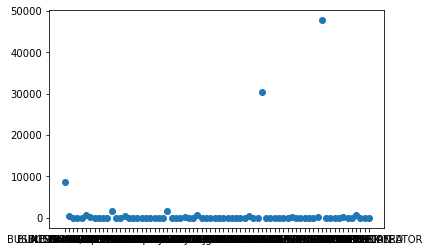

In [10]:
fig, ax1 = plt.subplots()
plt.scatter(count_table.index, count_table['count'])
plt.show()

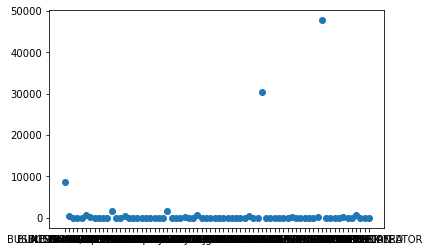

In [11]:
from matplotlib.pyplot import figure
#figure(figsize=(8, 6), dpi=80)
plt.scatter(count_table.index, count_table['count'])
plt.show()

In [12]:
dominant_occus = count_table[count_table['count']>30]
dominant_occus.sort_values(by = 'count', ascending = False)

col_0,count
occupation_name,
SERVICE,47718
OTHERS,30375
ACCOUNTANT,8760
FARMER,1725
CIVIL SERVENT,1617
HOUSE WIFE,679
TEACHER,660
BUSINESSMAN,655
MONK,451


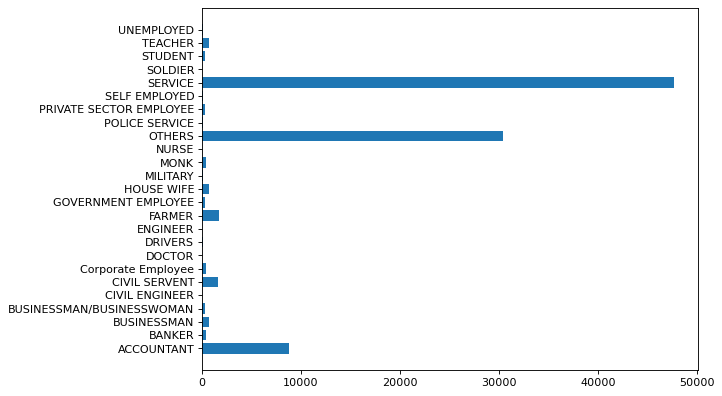

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(dominant_occus.index, dominant_occus['count'])
plt.show()

In [14]:
top5 = dominant_occus['count'].nlargest(n = 5)
top5

occupation_name
SERVICE          47718
OTHERS           30375
ACCOUNTANT        8760
FARMER            1725
CIVIL SERVENT     1617
Name: count, dtype: int64

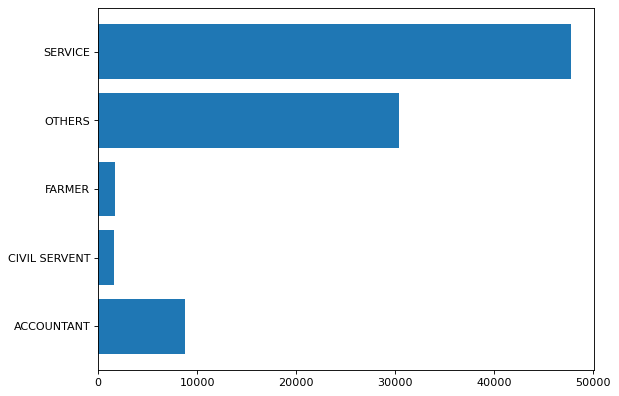

In [15]:
figure(figsize=(8, 6), dpi=80)
top5_occu = dominant_occus[dominant_occus['count']>= min(top5)]
plt.barh(top5_occu.index, top5_occu['count'])
plt.show()

In [16]:
count_table

col_0,count
occupation_name,
ACCOUNTANT,8760
BANKER,384
BARBER,2
BUILDING CONTRACTOR,1
BUSINESS EXECUTIVE,24
...,...
TAILOR,8
TEACHER,660
TECHNICIAN,10


In [17]:
#occus = count_table.index.value_counts().index.tolist()
text = " ".join(occu for occu in count_table.index.astype(str))

print ("There are {} words in the combination of all cells in column occupation_name.".format(len(text)))
#stopwords = set(STOPWORDS)
#WordCloud().generate(occus)

There are 839 words in the combination of all cells in column occupation_name.


In [18]:
text = " ".join(occu for occu in data['occupation_name'].astype(str))
print ("There are {} words in the combination of all cells in column occupation_name.".format(len(text)))

There are 793349 words in the combination of all cells in column occupation_name.


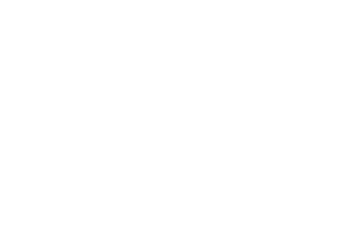

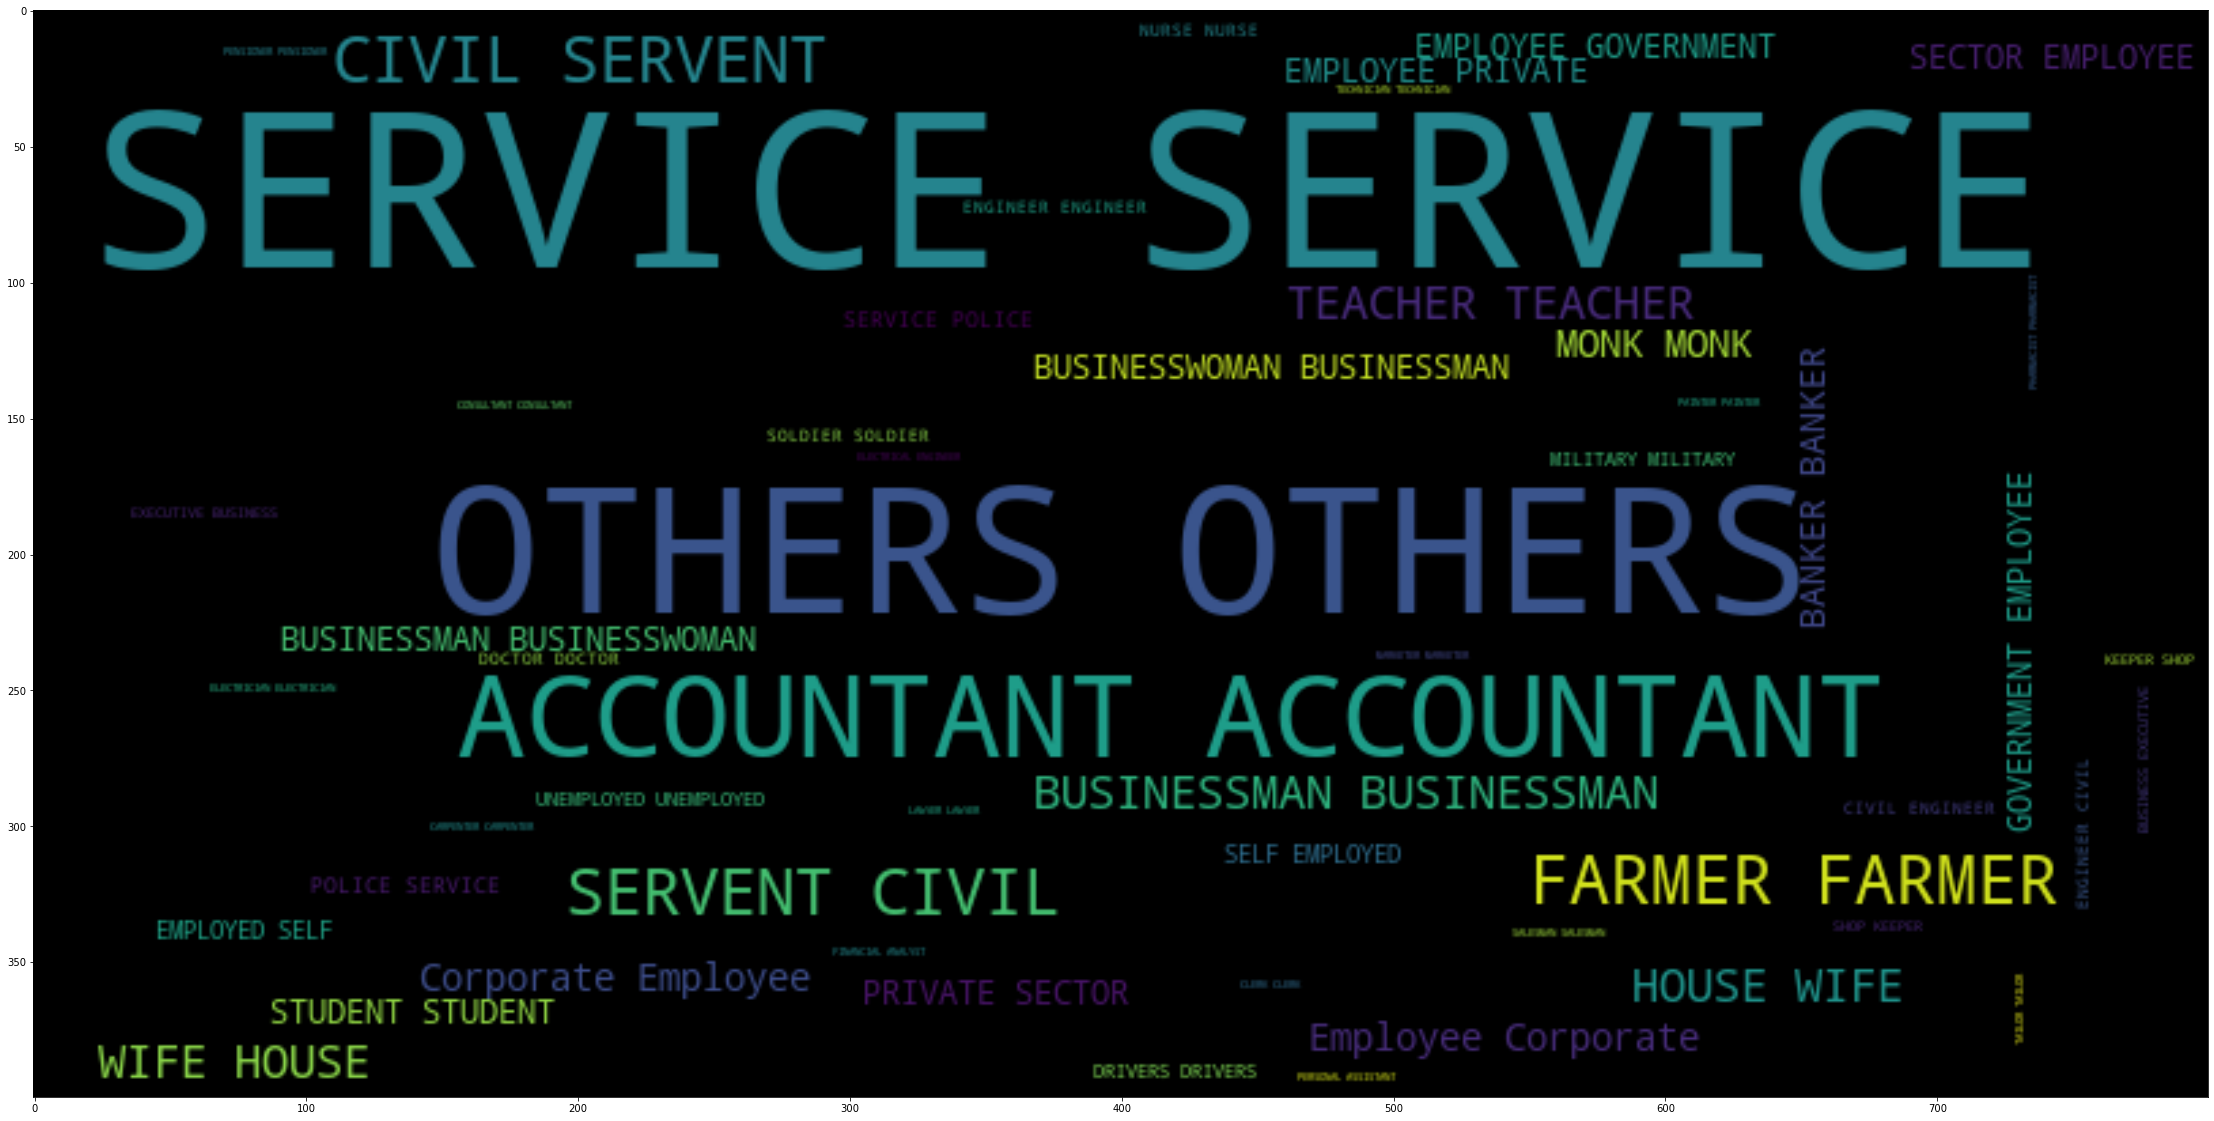

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Practice

In [20]:
count_table = count_table.rename_axis('occupation').reset_index()

In [21]:
count_table

col_0,occupation,count
0,ACCOUNTANT,8760
1,BANKER,384
2,BARBER,2
3,BUILDING CONTRACTOR,1
4,BUSINESS EXECUTIVE,24
...,...,...
67,TAILOR,8
68,TEACHER,660
69,TECHNICIAN,10
70,TELEPHONE OPERATOR,2


In [32]:
from collections import Counter
#x = count_table['occupation']
values = count_table['count']
x = Counter(count_table['occupation']).most_common(5)

TypeError: unhashable type: 'numpy.ndarray'

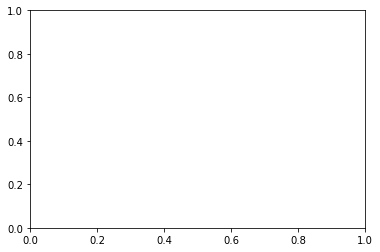

In [33]:
plt.stem(x)
plt.show()

In [22]:
labels = Counter(data['occupation_name']).most_common(5)
lab = pd.DataFrame(labels,columns =['occupation_name','count'])
lab

NameError: name 'Counter' is not defined

In [ ]:
labels = lab['occupation_name'].to_string(index = False)
labels

In [ ]:
#!pip install squarify 
import squarify
from collections import Counter
labels = labels
sizes = count_table['count']
#colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, alpha=.8)

In [ ]:
labels[0+1]

In [ ]:
# list to dictionary
 
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst),len(lst))}
    return res_dct
         
# Driver code
lst = labels
print(Convert(lst))


In [ ]:
#combining f_name and l_name to cust_name
data_test = data
data_test["cust_name"] = data_test['f_name'].astype(str).fillna('') + ' '+ data_test['l_name'].fillna('')
data_test

In [ ]:
cols = ['client_id', 'acc_type', 'cd_code', 'cust_name', 'nationality','ID', 'DzongkhagID', 'tpn', 
        'phone', 'user_name', 'email', 'bank_id','bank_account', 'address',
        'title', 'occupation', 'bank_account_type']
data_test = data_test[cols]
data_test

In [ ]:
data_test['cust_name'].value_counts()

In [ ]:
from collections import Counter
common = Counter(data_test['cust_name']).most_common(50)
common